In [1]:
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('data/Sample_2000_Road_Traffic_Fine_Management_Process.xes')

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


parsing log, completed traces ::   0%|          | 0/2000 [00:00<?, ?it/s]

In [2]:
print(log[0])

{'attributes': {'concept:name': 'A10025'}, 'events': [{'amount': 36.0, 'totalPaymentAmount': 0.0, 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2007, 3, 22, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'dismissal': 'NIL', 'org:resource': '537', 'concept:name': 'Create Fine', 'vehicleClass': 'A', 'points': 0, 'article': 157}, '..', {'lifecycle:transition': 'complete', 'concept:name': 'Send for Credit Collection', 'time:timestamp': datetime.datetime(2009, 3, 30, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}


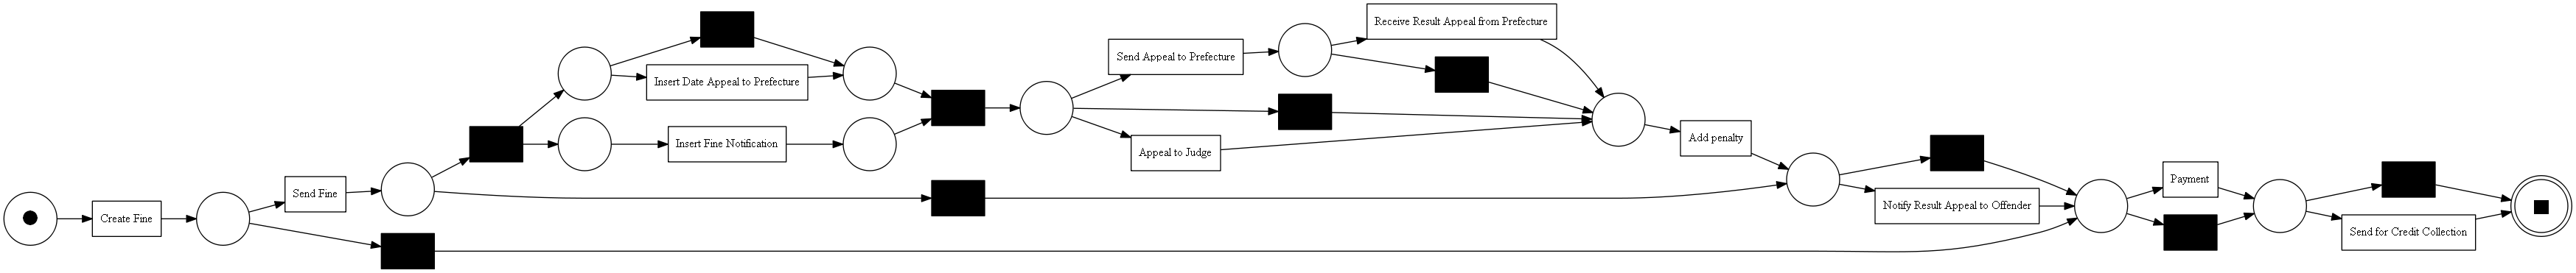

In [3]:
from pm4py.objects.petri_net.importer import importer as pnml_importer
net, initial_marking, final_marking = pnml_importer.apply("data/sample_petrinet.pnml")    

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [4]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, net, initial_marking, final_marking)

replaying log with TBR, completed variants ::   0%|          | 0/26 [00:00<?, ?it/s]

In [118]:
for trace in replayed_traces:
    print(trace)

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n15, 'Create Fine'), (n17, 'Send Fine'), (n19, None), (n21, 'Insert Fine Notification'), (n22, None), (n20, None), (n24, None), (n29, 'Add penalty'), (n30, None), (n32, None), (n35, 'Send for Credit Collection')], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 13, 'remaining_tokens': 0, 'produced_tokens': 13}
{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n15, 'Create Fine'), (n17, 'Send Fine'), (n19, None), (n21, 'Insert Fine Notification'), (n22, None), (n20, None), (n24, None), (n29, 'Add penalty'), (n30, None), (n32, None), (n35, 'Send for Credit Collection')], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 13, 'remaining_tokens': 0, 'produced_tokens': 13}
{'trace_is_fit': True, 'trace_fitness': 1.

In [119]:
len(replayed_traces)

2000

In [9]:
net

places: [ n1, n10, n11, n12, n13, n14, n2, n3, n4, n5, n6, n7, n8, n9 ]
transitions: [ (n15, 'Create Fine'), (n16, None), (n17, 'Send Fine'), (n18, None), (n19, None), (n20, None), (n21, 'Insert Fine Notification'), (n22, None), (n23, 'Insert Date Appeal to Prefecture'), (n24, None), (n25, 'Appeal to Judge'), (n26, 'Send Appeal to Prefecture'), (n27, None), (n28, 'Receive Result Appeal from Prefecture'), (n29, 'Add penalty'), (n30, None), (n31, 'Notify Result Appeal to Offender'), (n32, None), (n33, 'Payment'), (n34, None), (n35, 'Send for Credit Collection') ]
arcs: [ (n15, 'Create Fine')->n3, (n16, None)->n4, (n17, 'Send Fine')->n5, (n18, None)->n6, (n19, None)->n10, (n19, None)->n8, (n20, None)->n7, (n21, 'Insert Fine Notification')->n9, (n22, None)->n11, (n23, 'Insert Date Appeal to Prefecture')->n11, (n24, None)->n12, (n25, 'Appeal to Judge')->n12, (n26, 'Send Appeal to Prefecture')->n13, (n27, None)->n12, (n28, 'Receive Result Appeal from Prefecture')->n12, (n29, 'Add penalty')->

In [ ]:
##usage= get_labels_set(input_transition_set)
def get_labels_set(input_transition_set):
    label_set=set()
    for transition in input_transition_set:
        label_set.add(transition._Transition__get_label())
    return label_set

In [109]:
##usage= get_input_transitions('n4')
def get_initial_start(intial_place):
    for place in net.places:
        if place._Place__get_name()==intial_place:
            initial_start=place
    return initial_start

In [107]:
##usage= get_input_transitions(net,initial_start)
def get_input_transitions(net,place):
    transition=list()
    if place in net.places:
        for arc in net.arcs:
            if arc._Arc__get_target()==place:
                if arc._Arc__get_source()._Transition__get_label() is None:
                    for new_place in arc._Arc__get_source()._Transition__get_in_arcs():
                        transition.extend(get_input_transitions(net,new_place._Arc__get_source()))
                else:
                    transition.append(arc._Arc__get_source())
        return transition
    else:
        return None

In [93]:
##usage= get_output_transitions(net,initial_start)
def get_output_transitions(net,place):
    transition=list()
    if place in net.places:
        for arc in net.arcs:
            if arc._Arc__get_source()==place:
                if arc._Arc__get_target()._Transition__get_label() is None:
                    for new_place in arc._Arc__get_target()._Transition__get_out_arcs():
                        transition.extend(get_output_transitions(net,new_place._Arc__get_target()))
                else:
                    transition.append(arc._Arc__get_target())
        return transition
    else:
        return None

# place n5 for original log
Inputs:  
    (n20, None)->n5,
    (n22, None)->n5
    
Outputs: 
    n5->(n30, 'Send Fine')

In [66]:
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
input_transition_set={'n20','n22'}
output_transition_set={'n30'}
output_transition_label_set={ 'Send Fine'}
token_produced=0
token_consumed=0
token_left=0
df=pd.DataFrame()
for trace,case in zip(replayed_traces, log):
    if trace['trace_is_fit']==True:
        for active_trace in trace['activated_transitions']:
            if active_trace._Transition__get_name() in input_transition_set :
                token_produced=token_produced+1
            if active_trace._Transition__get_name() in output_transition_set:
                token_consumed=token_consumed+1
                for events in case:
                    if events['concept:name'] in output_transition_label_set:
                        row_df = pd.DataFrame([pd.Series([events['concept:name'], events['time:timestamp']])])
                        df = pd.concat([row_df, df], ignore_index=True)
            if token_consumed==9000:
                break
print(token_produced)
print(token_consumed)

df

9000
9000


,0,1
0,Send Fine,2008-11-18 00:00:00+01:00
1,Send Fine,2008-11-18 00:00:00+01:00
2,Send Fine,2008-11-18 00:00:00+01:00
3,Send Fine,2009-05-12 00:00:00+02:00
4,Send Fine,2009-05-12 00:00:00+02:00
...,...,...
8995,Send Fine,2007-07-17 00:00:00+02:00
8996,Send Fine,2007-07-17 00:00:00+02:00
8997,Send Fine,2007-07-17 00:00:00+02:00
8998,Send Fine,2006-12-12 00:00:00+01:00


In [95]:
#df['Date'] = pd.to_datetime(df[1], utc=True)
#df['Date'] = pd.to_datetime(df['DateTime']).dt.date
print(df[['Date',0]].groupby('Date').count())

              0
Date           
2006-11-15    1
2006-12-03    1
2006-12-04   14
2006-12-11   64
2006-12-12  245
2006-12-13  279
2006-12-14  188
2006-12-28   71
2007-04-03   48
2007-04-04    4
2007-06-26    6
2007-07-16  271
2007-08-01  372
2007-08-19  379
2007-08-21  413
2007-09-12  380
2007-09-28  402
2007-10-30  369
2007-12-09  375
2007-12-10  389
2007-12-26  357
2008-01-17  386
2008-02-08  397
2008-02-29  336
2008-04-16  230
2008-06-03  253
2008-06-04  153
2008-07-13  263
2008-07-29  358
2008-09-02  361
2008-09-10  381
2008-10-10  251
2008-10-20  260
2008-11-17  240
2008-12-09  147
2009-01-02  145
2009-01-13   52
2009-01-22    7
2009-01-27    1
2009-03-31   28
2009-05-11    9
2009-05-31   12
2009-06-11    6
2009-07-19    6
2009-07-27   18
2009-07-28   11
2009-09-17    3
2009-09-24    9
2009-11-10    1
2009-11-27    2
2009-12-08    2
2009-12-16    7
2009-12-17   21
2010-01-18   15
2010-07-27    1


In [56]:
print(len(replayed_traces))

150370


In [38]:
print(len(log))

150370


In [69]:
for trace,case in zip(replayed_traces, log):
    print(trace)
    print("")
    for events in case:
        print(events)
        
    break

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n18, 'Create Fine'), (n20, None), (n30, 'Send Fine'), (n31, None), (n33, None), (n35, None), (n37, None)], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 8, 'remaining_tokens': 0, 'produced_tokens': 8}

{'amount': 35.0, 'org:resource': '561', 'dismissal': 'NIL', 'concept:name': 'Create Fine', 'vehicleClass': 'A', 'totalPaymentAmount': 0.0, 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2006, 7, 24, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'article': 157, 'points': 0}
{'concept:name': 'Send Fine', 'lifecycle:transition': 'complete', 'expense': 11.0, 'time:timestamp': datetime.datetime(2006, 12, 5, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}


In [70]:
print(datetime.datetime(2006, 7, 24, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))))

NameError: name 'datetime' is not defined

In [8]:
net

places: [ n1, n10, n11, n12, n13, n14, n2, n3, n4, n5, n6, n7, n8, n9 ]
transitions: [ (n15, 'Create Fine'), (n16, None), (n17, 'Send Fine'), (n18, None), (n19, None), (n20, None), (n21, 'Insert Fine Notification'), (n22, None), (n23, 'Insert Date Appeal to Prefecture'), (n24, None), (n25, 'Appeal to Judge'), (n26, 'Send Appeal to Prefecture'), (n27, None), (n28, 'Receive Result Appeal from Prefecture'), (n29, 'Add penalty'), (n30, None), (n31, 'Notify Result Appeal to Offender'), (n32, None), (n33, 'Payment'), (n34, None), (n35, 'Send for Credit Collection') ]
arcs: [ (n15, 'Create Fine')->n3, (n16, None)->n4, (n17, 'Send Fine')->n5, (n18, None)->n6, (n19, None)->n10, (n19, None)->n8, (n20, None)->n7, (n21, 'Insert Fine Notification')->n9, (n22, None)->n11, (n23, 'Insert Date Appeal to Prefecture')->n11, (n24, None)->n12, (n25, 'Appeal to Judge')->n12, (n26, 'Send Appeal to Prefecture')->n13, (n27, None)->n12, (n28, 'Receive Result Appeal from Prefecture')->n12, (n29, 'Add penalty')->

# for sample log n6
Input
    (n29, 'Add penalty')->n6
    
Output-
    n6->(n30, None), 
    n6->(n31, 'Notify Result Appeal to Offender')

In [162]:
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
initial_start=get_initial_start('n6')
input_transition_set=get_input_transitions(net,initial_start)
input_transition_label_set=get_labels_set(input_transition_set)
print(input_transition_set)
print(input_transition_label_set)
output_transition_set=get_output_transitions(net,initial_start)
output_transition_label_set=get_labels_set(output_transition_set)
print(output_transition_set)
print(output_transition_label_set)
token_produced=0
token_consumed=0
token_left=0
df=pd.DataFrame()
for trace,case in zip(replayed_traces, log):
    if trace['trace_is_fit']==True:
        for active_trace in trace['activated_transitions']:
            if active_trace in input_transition_set :
                token_produced=token_produced+1
                last_event=None
                for events in case:
                    if events['concept:name'] in input_transition_label_set:
                        last_event=events
                if last_event is not None:
                    row_df = pd.DataFrame([pd.Series([last_event['concept:name'], last_event['time:timestamp']])])
                    df = pd.concat([row_df, df], ignore_index=True)
            if active_trace in output_transition_set:
                token_consumed=token_consumed+1
                for events in case:
                    if events['concept:name'] in output_transition_label_set:
                        row_df = pd.DataFrame([pd.Series([events['concept:name'], events['time:timestamp']])])
                        df = pd.concat([row_df, df], ignore_index=True)
                        break
        
print(token_produced)
print(token_consumed)

df

[(n17, 'Send Fine'), (n29, 'Add penalty')]
{'Add penalty', 'Send Fine'}
[(n31, 'Notify Result Appeal to Offender'), (n33, 'Payment'), (n35, 'Send for Credit Collection')]
{'Notify Result Appeal to Offender', 'Send for Credit Collection', 'Payment'}
2084
1561


,0,1
0,Send for Credit Collection,2004-01-10 00:00:00+01:00
1,Add penalty,2003-01-04 00:00:00+01:00
2,Add penalty,2003-01-04 00:00:00+01:00
3,Send for Credit Collection,2004-01-10 00:00:00+01:00
4,Add penalty,2002-12-30 00:00:00+01:00
...,...,...
3640,Add penalty,2007-09-21 00:00:00+02:00
3641,Add penalty,2007-09-21 00:00:00+02:00
3642,Send for Credit Collection,2009-03-30 00:00:00+02:00
3643,Add penalty,2007-10-08 00:00:00+02:00


In [164]:
df['Date'] = pd.to_datetime(df[1], utc=True)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df=df[['Date',0]].groupby(['Date',0]).size().sort_values(ascending=False).reset_index(name='count') 

df=df.pivot(index='Date', columns=0, values='count').fillna(0)
df['TokenProduced'] = df[input_transition_label_set].sum(axis=1)
df['TokenConsumed'] = df[output_transition_label_set].sum(axis=1)

In [154]:
df=df.pivot(index='Date', columns=0, values='count').fillna(0)
df['TokenProduced'] = df[input_transition_label_set].sum(axis=1)
df['TokenConsumed'] = df[output_transition_label_set].sum(axis=1)

In [166]:

print(df.sort_values(by=['Date'],ascending=True))

0           Add penalty  Notify Result Appeal to Offender  Payment  Send Fine  \
Date                                                                            
2000-01-13          0.0                               0.0      1.0        0.0   
2000-01-31          0.0                               0.0      1.0        0.0   
2000-02-08          0.0                               0.0      1.0        0.0   
2000-02-16          0.0                               0.0      0.0        1.0   
2000-02-21          0.0                               0.0      1.0        0.0   
...                 ...                               ...      ...        ...   
2013-05-12          0.0                               0.0      1.0        0.0   
2013-05-21          0.0                               0.0      1.0        0.0   
2013-06-03          0.0                               0.0      1.0        0.0   
2013-06-06          0.0                               0.0      0.0        7.0   
2013-06-17          0.0     

In [114]:
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking

input_transition_set={'n29'}
output_transition_set={'n30','n31'}
input_transition_label_set={ 'Add penalty'}
output_transition_label_set={ 'None','Notify Result Appeal to Offender'}
token_produced=0
token_consumed=0
token_left=0
df=pd.DataFrame()
for trace,case in zip(replayed_traces, log):
    if trace['trace_is_fit']==True:
        for active_trace in trace['activated_transitions']:
            if active_trace._Transition__get_name() in input_transition_set :
                token_produced=token_produced+1
                for events in case:
                    if events['concept:name'] in input_transition_label_set:
                        row_df = pd.DataFrame([pd.Series([events['concept:name'], events['time:timestamp']])])
                        df = pd.concat([row_df, df], ignore_index=True)
            if active_trace._Transition__get_name() in output_transition_set:
                token_consumed=token_consumed+1
                for events in case:
                    if events['concept:name'] in output_transition_label_set:
                        row_df = pd.DataFrame([pd.Series([events['concept:name'], events['time:timestamp']])])
                        df = pd.concat([row_df, df], ignore_index=True)
        
print(token_produced)
print(token_consumed)

df

870
1214


,0,1
0,Add penalty,2003-01-04 00:00:00+01:00
1,Add penalty,2002-12-30 00:00:00+01:00
2,Add penalty,2003-01-01 00:00:00+01:00
3,Add penalty,2002-12-05 00:00:00+01:00
4,Add penalty,2003-01-04 00:00:00+01:00
...,...,...
866,Add penalty,2007-09-23 00:00:00+02:00
867,Add penalty,2007-10-09 00:00:00+02:00
868,Add penalty,2007-10-18 00:00:00+02:00
869,Add penalty,2007-09-21 00:00:00+02:00


In [73]:
#df['Date'] = pd.to_datetime(df[1], utc=True)
#df['Date'] = pd.to_datetime(df['DateTime']).dt.date
print(df[['Date',0]].groupby('Date').count())

NameError: name 'PetriNet' is not defined

[(n31, 'Notify Result Appeal to Offender'),
 (n33, 'Payment'),
 (n35, 'Send for Credit Collection')]